### Descripción Inicial

A continuación se muestra un análisis del los registros de Covid-19 en Colombia.

El objetivo es realizar una exploración de los datos, analizar la correlación entre las variables.

Se tomaron los datos de la pagina de Kaggle:
https://www.kaggle.com/alfredomaussa/covid19-colombia-httpswwwdatosgovco

### Importando las librerias que se van usar

In [1]:
#!pip3 install --upgrade pareto
#!pip3 install --upgrade paretochart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Cargando el archivo csv y guardandolo como Dataframe

In [2]:
df = pd.read_csv("data.csv", sep=',') #reporte descargado el 06-10-2020

/home/david/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Exploración inicial Dataframe

In [3]:
# Imprimiendo del Dataframe los 3 primeros registros
df.head(3)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6,NaN


In [4]:
# Revisando el numero de registros del archivo (Filas, Columnas).
df.shape

(1117977, 23)

In [5]:
# Revisando el tipo de datos de las columnas
df.dtypes

fecha reporte web                object
ID de caso                        int64
Fecha de notificación            object
Código DIVIPOLA departamento      int64
Nombre departamento              object
Código DIVIPOLA municipio         int64
Nombre municipio                 object
Edad                              int64
Unidad de medida de edad          int64
Sexo                             object
Tipo de contagio                 object
Ubicación del caso               object
Estado                           object
Código ISO del país             float64
Nombre del país                  object
Recuperado                       object
Fecha de inicio de síntomas      object
Fecha de muerte                  object
Fecha de diagnóstico             object
Fecha de recuperación            object
Tipo de recuperación             object
Pertenencia étnica               object
Nombre del grupo étnico          object
dtype: object

In [6]:
df["Nombre municipio"].value_counts()

BOGOTA                      329879
MEDELLIN                    103229
CALI                         64965
BARRANQUILLA                 41589
CARTAGENA                    26979
                             ...  
GUICAN                           1
LA CAPILLA                       1
PAPUNAUA (MORICHAL) (CD)         1
PANDI                            1
Galapa                           1
Name: Nombre municipio, Length: 1019, dtype: int64

In [7]:
df = df.rename(columns={'Fecha de diagnóstico':'Fecha diagnostico',
                        'Fecha de recuperación':'Fecha recuperado',   
                       })

### Identificando desde que periodos se tiene información

Cambianto el formato de las columnas a datetime

In [8]:
df["Fecha de notificación"] = pd.to_datetime(df["Fecha de notificación"])

In [9]:
df["Fecha de muerte"] = pd.to_datetime(df["Fecha de muerte"])

In [10]:
# Remplazar "SIN DATO" por vacio para poder cambiar el formato
df["Fecha diagnostico"] = df["Fecha diagnostico"].apply(str)
df["Fecha diagnostico"]= df["Fecha diagnostico"].replace({"SIN DATO": "", 
                                                          "Sin dato": "",
                                                         }) 
df["Fecha diagnostico"] = pd.to_datetime(df["Fecha diagnostico"])

In [11]:
df["Fecha recuperado"] = pd.to_datetime(df["Fecha recuperado"])
df["fecha reporte web"] = pd.to_datetime(df["fecha reporte web"])

In [12]:
# Verificando el cambio de formato
df[["Fecha de notificación", 
    "Fecha de muerte", 
    "Fecha diagnostico", 
    "Fecha recuperado", 
    "fecha reporte web"]].dtypes

Fecha de notificación    datetime64[ns]
Fecha de muerte          datetime64[ns]
Fecha diagnostico        datetime64[ns]
Fecha recuperado         datetime64[ns]
fecha reporte web        datetime64[ns]
dtype: object

In [13]:
# Imprimirndo para ver el formato
df[["Fecha de notificación", 
    "Fecha de muerte", 
    "Fecha diagnostico", 
    "Fecha recuperado", 
    "fecha reporte web"]].head(3)

,Fecha de notificación,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web
0,2020-02-03,NaT,2020-06-03,2020-03-13,2020-06-03
1,2020-06-03,NaT,2020-09-03,2020-03-19,2020-09-03
2,2020-07-03,NaT,2020-09-03,2020-03-15,2020-09-03


In [14]:
# Fecha minima por columna
df[["Fecha de notificación", 
    "Fecha de muerte", 
    "Fecha diagnostico", 
    "Fecha recuperado", 
    "fecha reporte web"]].min()

Fecha de notificación   2020-01-04
Fecha de muerte         2020-01-04
Fecha diagnostico       2020-01-04
Fecha recuperado        2020-01-04
fecha reporte web       2020-01-04
dtype: datetime64[ns]

In [15]:
# Fecha maxima por columna
df[["Fecha de notificación", 
    "Fecha de muerte", 
    "Fecha diagnostico", 
    "Fecha recuperado", 
    "fecha reporte web"]].max()

Fecha de notificación   2020-12-10
Fecha de muerte         2020-12-10
Fecha diagnostico       2020-12-10
Fecha recuperado        2020-12-10
fecha reporte web       2020-12-10
dtype: datetime64[ns]

### Casos reportados por departamento o distrito

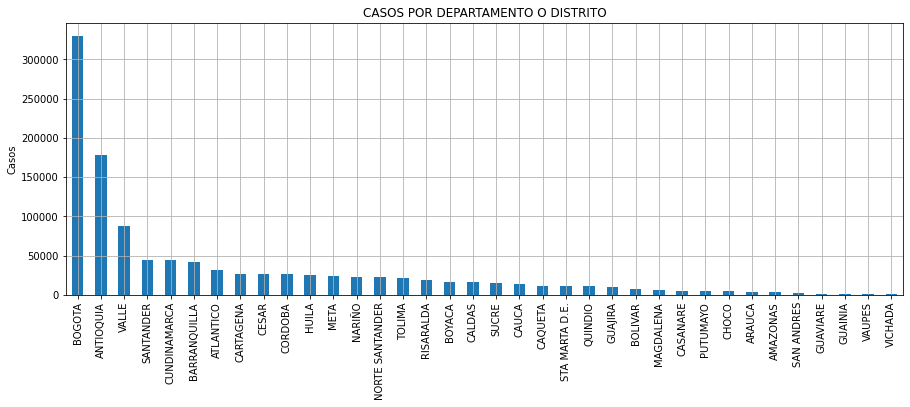

In [16]:
df["Nombre departamento"].value_counts().plot(kind='bar', figsize=(15, 5))
plt.title('CASOS POR DEPARTAMENTO O DISTRITO') # Titulo de la grafica
#plt.xlabel('Tipo tramite') # Titulo eje x
plt.ylabel('Casos') # Titulo eje y
plt.grid(True) # Lineas de cuadricula
plt.rc('xtick', labelsize=9) # Tamaño de fuente eje x a menor nuemro es mas grade la letra
plt.rc('ytick', labelsize=12) # Tamaño de fuente eje y a menor nuemro es mas grade la letra
plt.rc('axes', titlesize=15) # Tamaño de fuente titulo grafica
plt.rc('axes', labelsize=20) # Tamaño de fuente titulo ejes

### Pareto casos reportados por departamento o distrito

Se saca el pareto para ver en que departamentos o distritos se concentran los datos

In [17]:
# Imprimiendo los 10 primeros departamentos o distritos
df_frec = df['Nombre departamento'].value_counts().reset_index(name='Total')
df_frec = df_frec.rename(columns={"index": "Departamento_Distrito"})
df_frec["FA"] = 100*df_frec.Total.cumsum()/df_frec.Total.sum()
df_frec.head(10)

,Departamento_Distrito,Total,FA
0,BOGOTA,329879,29.506779
1,ANTIOQUIA,178735,45.494138
2,VALLE,87139,53.288484
3,SANTANDER,44184,57.240623
4,CUNDINAMARCA,43962,61.172904
5,BARRANQUILLA,41589,64.892927
6,ATLANTICO,31216,67.685113
7,CARTAGENA,26979,70.098312
8,CESAR,26920,72.506232
9,CORDOBA,26653,74.890271


In [18]:
# Filtrando el pareto y clasificando el 20% como otros
df_pareto = df_frec[df_frec["FA"]<=80]
total_otros = df_frec[df_frec["FA"]>=80].Total.sum()

df_pareto = df_pareto.append({"Departamento_Distrito" : "Otros" , 
                              "Total" : total_otros, 
                              "FA" : 100} , ignore_index=True)

df_pareto

,Departamento_Distrito,Total,FA
0,BOGOTA,329879,29.506779
1,ANTIOQUIA,178735,45.494138
2,VALLE,87139,53.288484
3,SANTANDER,44184,57.240623
4,CUNDINAMARCA,43962,61.172904
5,BARRANQUILLA,41589,64.892927
6,ATLANTICO,31216,67.685113
7,CARTAGENA,26979,70.098312
8,CESAR,26920,72.506232
9,CORDOBA,26653,74.890271


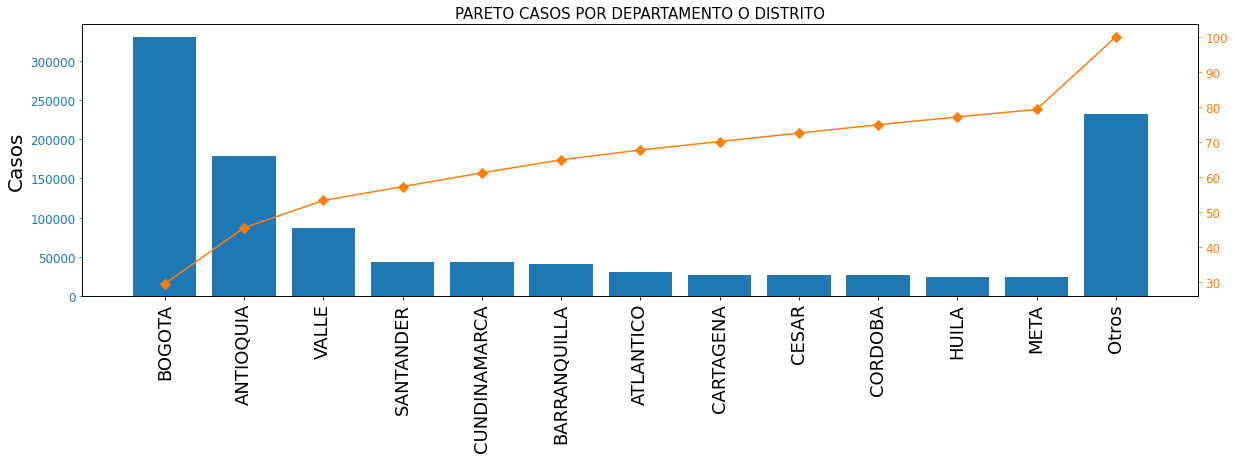

In [19]:
# Grafica pareto
fig, ax = plt.subplots(figsize=(20, 5))
plt.ylabel('Casos') # Titulo eje y
plt.title('PARETO CASOS POR DEPARTAMENTO O DISTRITO') # Titulo de la grafica
ax.bar(df_pareto.Departamento_Distrito, df_pareto["Total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_pareto.Departamento_Distrito, df_pareto["FA"], color="C1", marker="D", ms=7)
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="x", rotation=90, labelsize=18)
ax2.tick_params(axis="y", colors="C1")
plt.show()

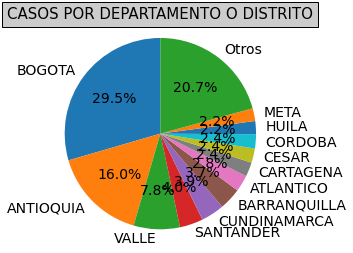

In [20]:
# Distribucón porcentual por departamento o distritos

plt.pie(df_pareto['Total'], 
        labels=df_pareto['Departamento_Distrito'], 
        startangle=90,
        autopct='%1.1f%%',
        radius=1.1,
        textprops={'fontsize': 14}, 
       )


plt.title("CASOS POR DEPARTAMENTO O DISTRITO", bbox={'facecolor':'0.8', 'pad':5})


fig.set_size_inches(10,10)

### Casos en el Tiempo

Flintrando en el dataframe original con las ciudades que representan el 80%

In [21]:
# Aplicando función para clasificar en el Dataframe original por pareto
lista_pareto = list(df_frec[df_frec["FA"]<=80].Departamento_Distrito)

def clasificacion(valor):
    
    if(valor in lista_pareto):
        resultado = valor
    else:
        resultado = "Otros"
    
    return resultado

In [22]:
# Aplicando funcion para crear una nueva columna
df["Clasif_Pareto"] = df["Nombre departamento"].apply(clasificacion)
df.head(3)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Clasif_Pareto
0,2020-06-03,1,2020-02-03,11,BOGOTA,11001,BOGOTA,19,1,F,...,ITALIA,Recuperado,27/2/2020 0:00:00,NaT,2020-06-03,2020-03-13,PCR,6,NaN,BOGOTA
1,2020-09-03,2,2020-06-03,76,VALLE,76111,BUGA,34,1,M,...,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaT,2020-09-03,2020-03-19,PCR,5,NaN,VALLE
2,2020-09-03,3,2020-07-03,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaT,2020-09-03,2020-03-15,PCR,6,NaN,ANTIOQUIA


In [23]:
# Extrayendo mes
df["Mes"] = df["Fecha diagnostico"].dt.month
df.head(3)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Clasif_Pareto,Mes
0,2020-06-03,1,2020-02-03,11,BOGOTA,11001,BOGOTA,19,1,F,...,Recuperado,27/2/2020 0:00:00,NaT,2020-06-03,2020-03-13,PCR,6,NaN,BOGOTA,6.0
1,2020-09-03,2,2020-06-03,76,VALLE,76111,BUGA,34,1,M,...,Recuperado,4/3/2020 0:00:00,NaT,2020-09-03,2020-03-19,PCR,5,NaN,VALLE,9.0
2,2020-09-03,3,2020-07-03,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,Recuperado,29/2/2020 0:00:00,NaT,2020-09-03,2020-03-15,PCR,6,NaN,ANTIOQUIA,9.0


In [24]:
# Se cuentan el numero casos por mes
df.Mes.value_counts()

8.0     223552
10.0    192044
7.0     189579
9.0     159078
6.0      76026
5.0      47059
2.0      42133
1.0      39695
4.0      39293
11.0     39061
3.0      38287
12.0     27880
Name: Mes, dtype: int64

In [25]:
df_casos_dia = df.groupby(['Fecha diagnostico'])["Fecha de notificación"].count().reset_index(name='Total')
df_casos_dia["FA"] = df_casos_dia.Total.cumsum()
df_casos_dia

,Fecha diagnostico,Total,FA
0,2020-01-04,162,162
1,2020-01-05,482,644
2,2020-01-06,1146,1790
3,2020-01-07,4544,6334
4,2020-01-08,10632,16966
...,...,...,...
237,2020-12-06,1270,1087816
238,2020-12-07,5615,1093431
239,2020-12-08,9600,1103031
240,2020-12-09,6573,1109604


Text(0.5, 1.0, 'TOTAL CASOS DIAGNOSTICADOS')

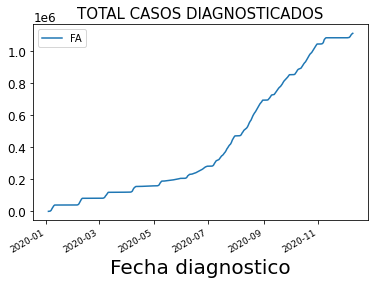

In [26]:
df_casos_dia.plot(x ='Fecha diagnostico', y='FA', kind = 'line')
plt.title("TOTAL CASOS DIAGNOSTICADOS")

### Muertes en el Tiempo

In [27]:
df_muertes_dia = df.groupby(['Fecha de muerte'])["Fecha de muerte"].count().reset_index(name='Total')
df_muertes_dia["FA"] = df_muertes_dia.Total.cumsum()

Text(0.5, 1.0, 'TOTAL MUERTES')

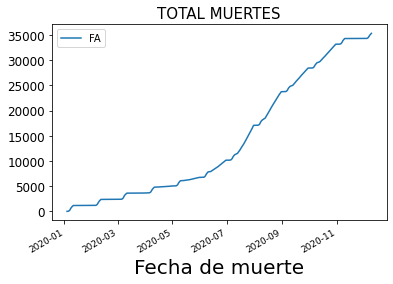

In [28]:
df_muertes_dia.plot(x ='Fecha de muerte', y='FA', kind = 'line')
plt.title("TOTAL MUERTES")

### Recuperados en el Tiempo

In [29]:
df_recuperados_dia = df.groupby(['Fecha recuperado'])["Fecha recuperado"].count().reset_index(name='Total')
df_recuperados_dia["FA"] = df_recuperados_dia.Total.cumsum()
df_recuperados_dia

,Fecha recuperado,Total,FA
0,2020-01-04,33,33
1,2020-01-05,113,146
2,2020-01-06,385,531
3,2020-01-07,1662,2193
4,2020-01-08,6988,9181
...,...,...,...
231,2020-12-06,867,981396
232,2020-12-07,1934,983330
233,2020-12-08,9266,992596
234,2020-12-09,9892,1002488


Text(0.5, 1.0, 'TOTAL RECUPERADOS')

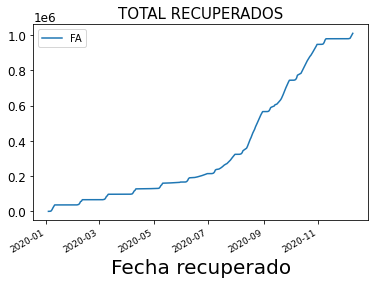

In [30]:
df_recuperados_dia.plot(x ='Fecha recuperado', y='FA', kind = 'line')
plt.title("TOTAL RECUPERADOS")

### Casos, Muertes y Recuperados en el Tiempo

In [31]:
# Renombrando columnas
df_casos = df_casos_dia.rename(columns={"Fecha diagnostico": "Fecha"})
df_muertes = df_muertes_dia.rename(columns={"Fecha de muerte": "Fecha"})
df_recuperados = df_recuperados_dia.rename(columns={"Fecha recuperado": "Fecha"})

In [32]:
# Selecionando solo las columnas Fecha y FA

In [33]:
df_casos = df_casos[["Fecha", "FA"]]
df_muertes = df_muertes[["Fecha", "FA"]]
df_recuperados = df_recuperados[["Fecha", "FA"]]

In [34]:
# Cruzando df_casos vs df_muertes
df_casos_muertes = pd.merge(df_casos, df_muertes, on='Fecha', how='outer', indicator=False)

In [35]:
# Cruzando df_casos_muertes vs df_recuperados_dia
df_casos_muertes_recup = pd.merge(df_casos_muertes, df_recuperados, 
                                  on='Fecha', how='outer', indicator=False)

df_casos_muertes_recup.head(3)

,Fecha,FA_x,FA_y,FA
0,2020-01-04,162,4.0,33.0
1,2020-01-05,644,17.0,146.0
2,2020-01-06,1790,69.0,531.0


In [36]:
# Renombrando Columnas
df_casos_muertes_recup = df_casos_muertes_recup.rename(columns={"FA_x": "Diagnosticados",
                                                                "FA_y": "Muertes",
                                                                "FA": "Recuperados"
                                                               })
df_casos_muertes_recup.head(3)

,Fecha,Diagnosticados,Muertes,Recuperados
0,2020-01-04,162,4.0,33.0
1,2020-01-05,644,17.0,146.0
2,2020-01-06,1790,69.0,531.0


In [37]:
# Rellenado los NaN con 0
df_casos_muertes_recup = df_casos_muertes_recup.fillna(0)
df_casos_muertes_recup.head(3)

,Fecha,Diagnosticados,Muertes,Recuperados
0,2020-01-04,162,4.0,33.0
1,2020-01-05,644,17.0,146.0
2,2020-01-06,1790,69.0,531.0


In [38]:
#Extrayendo mes
df_casos_muertes_recup["Mes"] = df_casos_muertes_recup["Fecha"].dt.month
df_casos_muertes_recup.head(3)

,Fecha,Diagnosticados,Muertes,Recuperados,Mes
0,2020-01-04,162,4.0,33.0,1
1,2020-01-05,644,17.0,146.0,1
2,2020-01-06,1790,69.0,531.0,1


### Casos, Muertes y Recuperados x Mes

In [39]:
df_C_M_R_mes_2 = (df.groupby(['Mes'])[["Fecha diagnostico", 
                                       "Fecha recuperado",
                                       "Fecha de muerte"]].count())
df_C_M_R_mes_2

,Fecha diagnostico,Fecha recuperado,Fecha de muerte
Mes,,,
1.0,39695,35541,1168
2.0,42133,36688,1376
3.0,38287,30400,1158
4.0,39293,33790,1276
5.0,47059,44802,1694
6.0,76026,72361,3398
7.0,189579,181113,7763
8.0,223552,212430,7255
9.0,159078,151728,4403


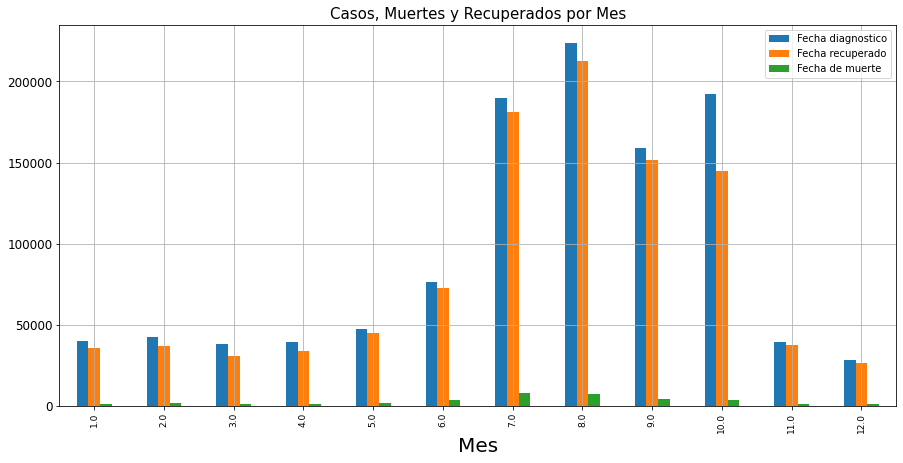

In [40]:
(df.groupby(['Mes'])[["Fecha diagnostico", 
                               "Fecha recuperado",
                               "Fecha de muerte"]].count()).plot.bar(figsize=(15, 7))

plt.title("Casos, Muertes y Recuperados por Mes")
plt.grid()

### Casos, Muertes y Recuperados x Mes (Acumulado)

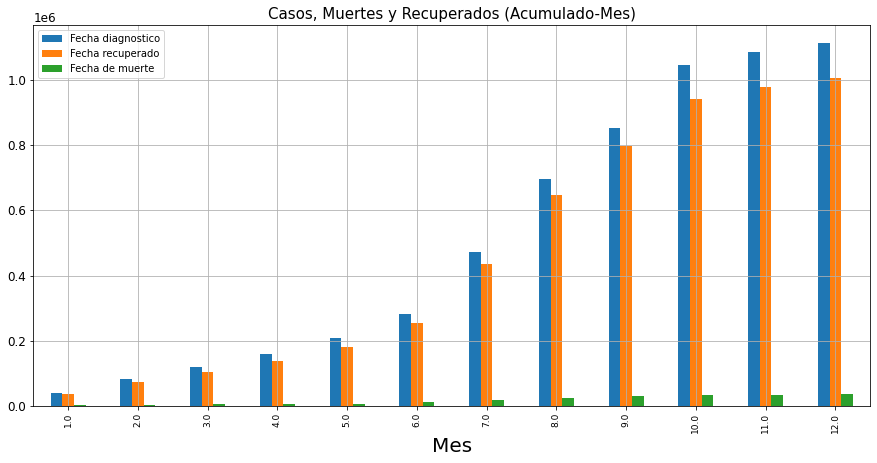

In [41]:
df_C_M_R_mes_3 = df_C_M_R_mes_2
df_C_M_R_mes_3.cumsum(axis=0).plot.bar(figsize=(15, 7))
plt.title("Casos, Muertes y Recuperados (Acumulado-Mes)")
plt.grid()

In [42]:
# Dejando el indice como fecha
df_casos_muertes_recup = df_casos_muertes_recup.set_index('Fecha')

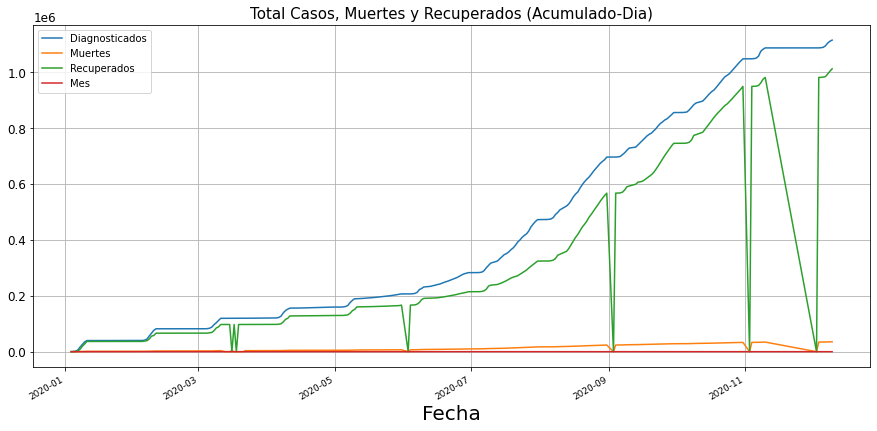

In [43]:
df_casos_muertes_recup.plot(figsize=(15, 7))
plt.title("Total Casos, Muertes y Recuperados (Acumulado-Dia)")
plt.grid()

### Casos x Ciudad en el Tiempo

In [44]:
df_casos_ciudad = df[df["Clasif_Pareto"] != "Otros"]
df_casos_ciudad = (df_casos_ciudad.groupby(['Fecha diagnostico', 'Clasif_Pareto'])
                   ["Fecha diagnostico"].count().reset_index(name='Total'))
#df_muertes_dia["FA"] = df_muertes_dia.Total.cumsum()
#df_muertes_dia

In [45]:
tabla_casos_ciudad = (pd.pivot_table(df_casos_ciudad, values='Total', index=["Fecha diagnostico"],
                                     columns=['Clasif_Pareto'], aggfunc=np.sum))

tabla_casos_ciudad.cumsum(axis=1).head(3) 

Clasif_Pareto,ANTIOQUIA,ATLANTICO,BARRANQUILLA,BOGOTA,CARTAGENA,CESAR,CORDOBA,CUNDINAMARCA,HUILA,META,SANTANDER,VALLE
Fecha diagnostico,,,,,,,,,,,,
2020-01-04,6.0,NaN,9.0,90.0,NaN,95.0,NaN,101.0,107.0,108.0,109.0,140.0
2020-01-05,3.0,52.0,57.0,204.0,218.0,NaN,221.0,225.0,238.0,328.0,NaN,390.0
2020-01-06,67.0,171.0,291.0,675.0,748.0,782.0,793.0,867.0,869.0,872.0,875.0,990.0


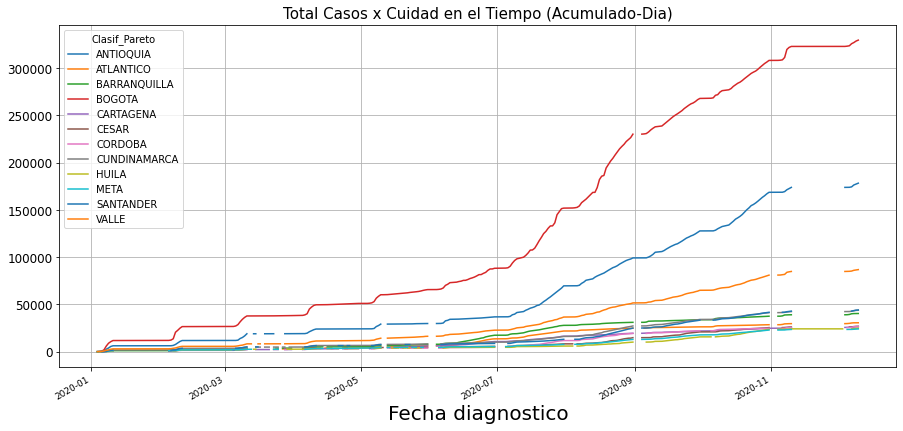

In [46]:
tabla_casos_ciudad.cumsum(axis=0).plot(figsize=(15, 7))
plt.title("Total Casos x Cuidad en el Tiempo (Acumulado-Dia)")
plt.grid()

### Analisis por Edad

Text(0.5, 1.0, 'Muertos por Edad')

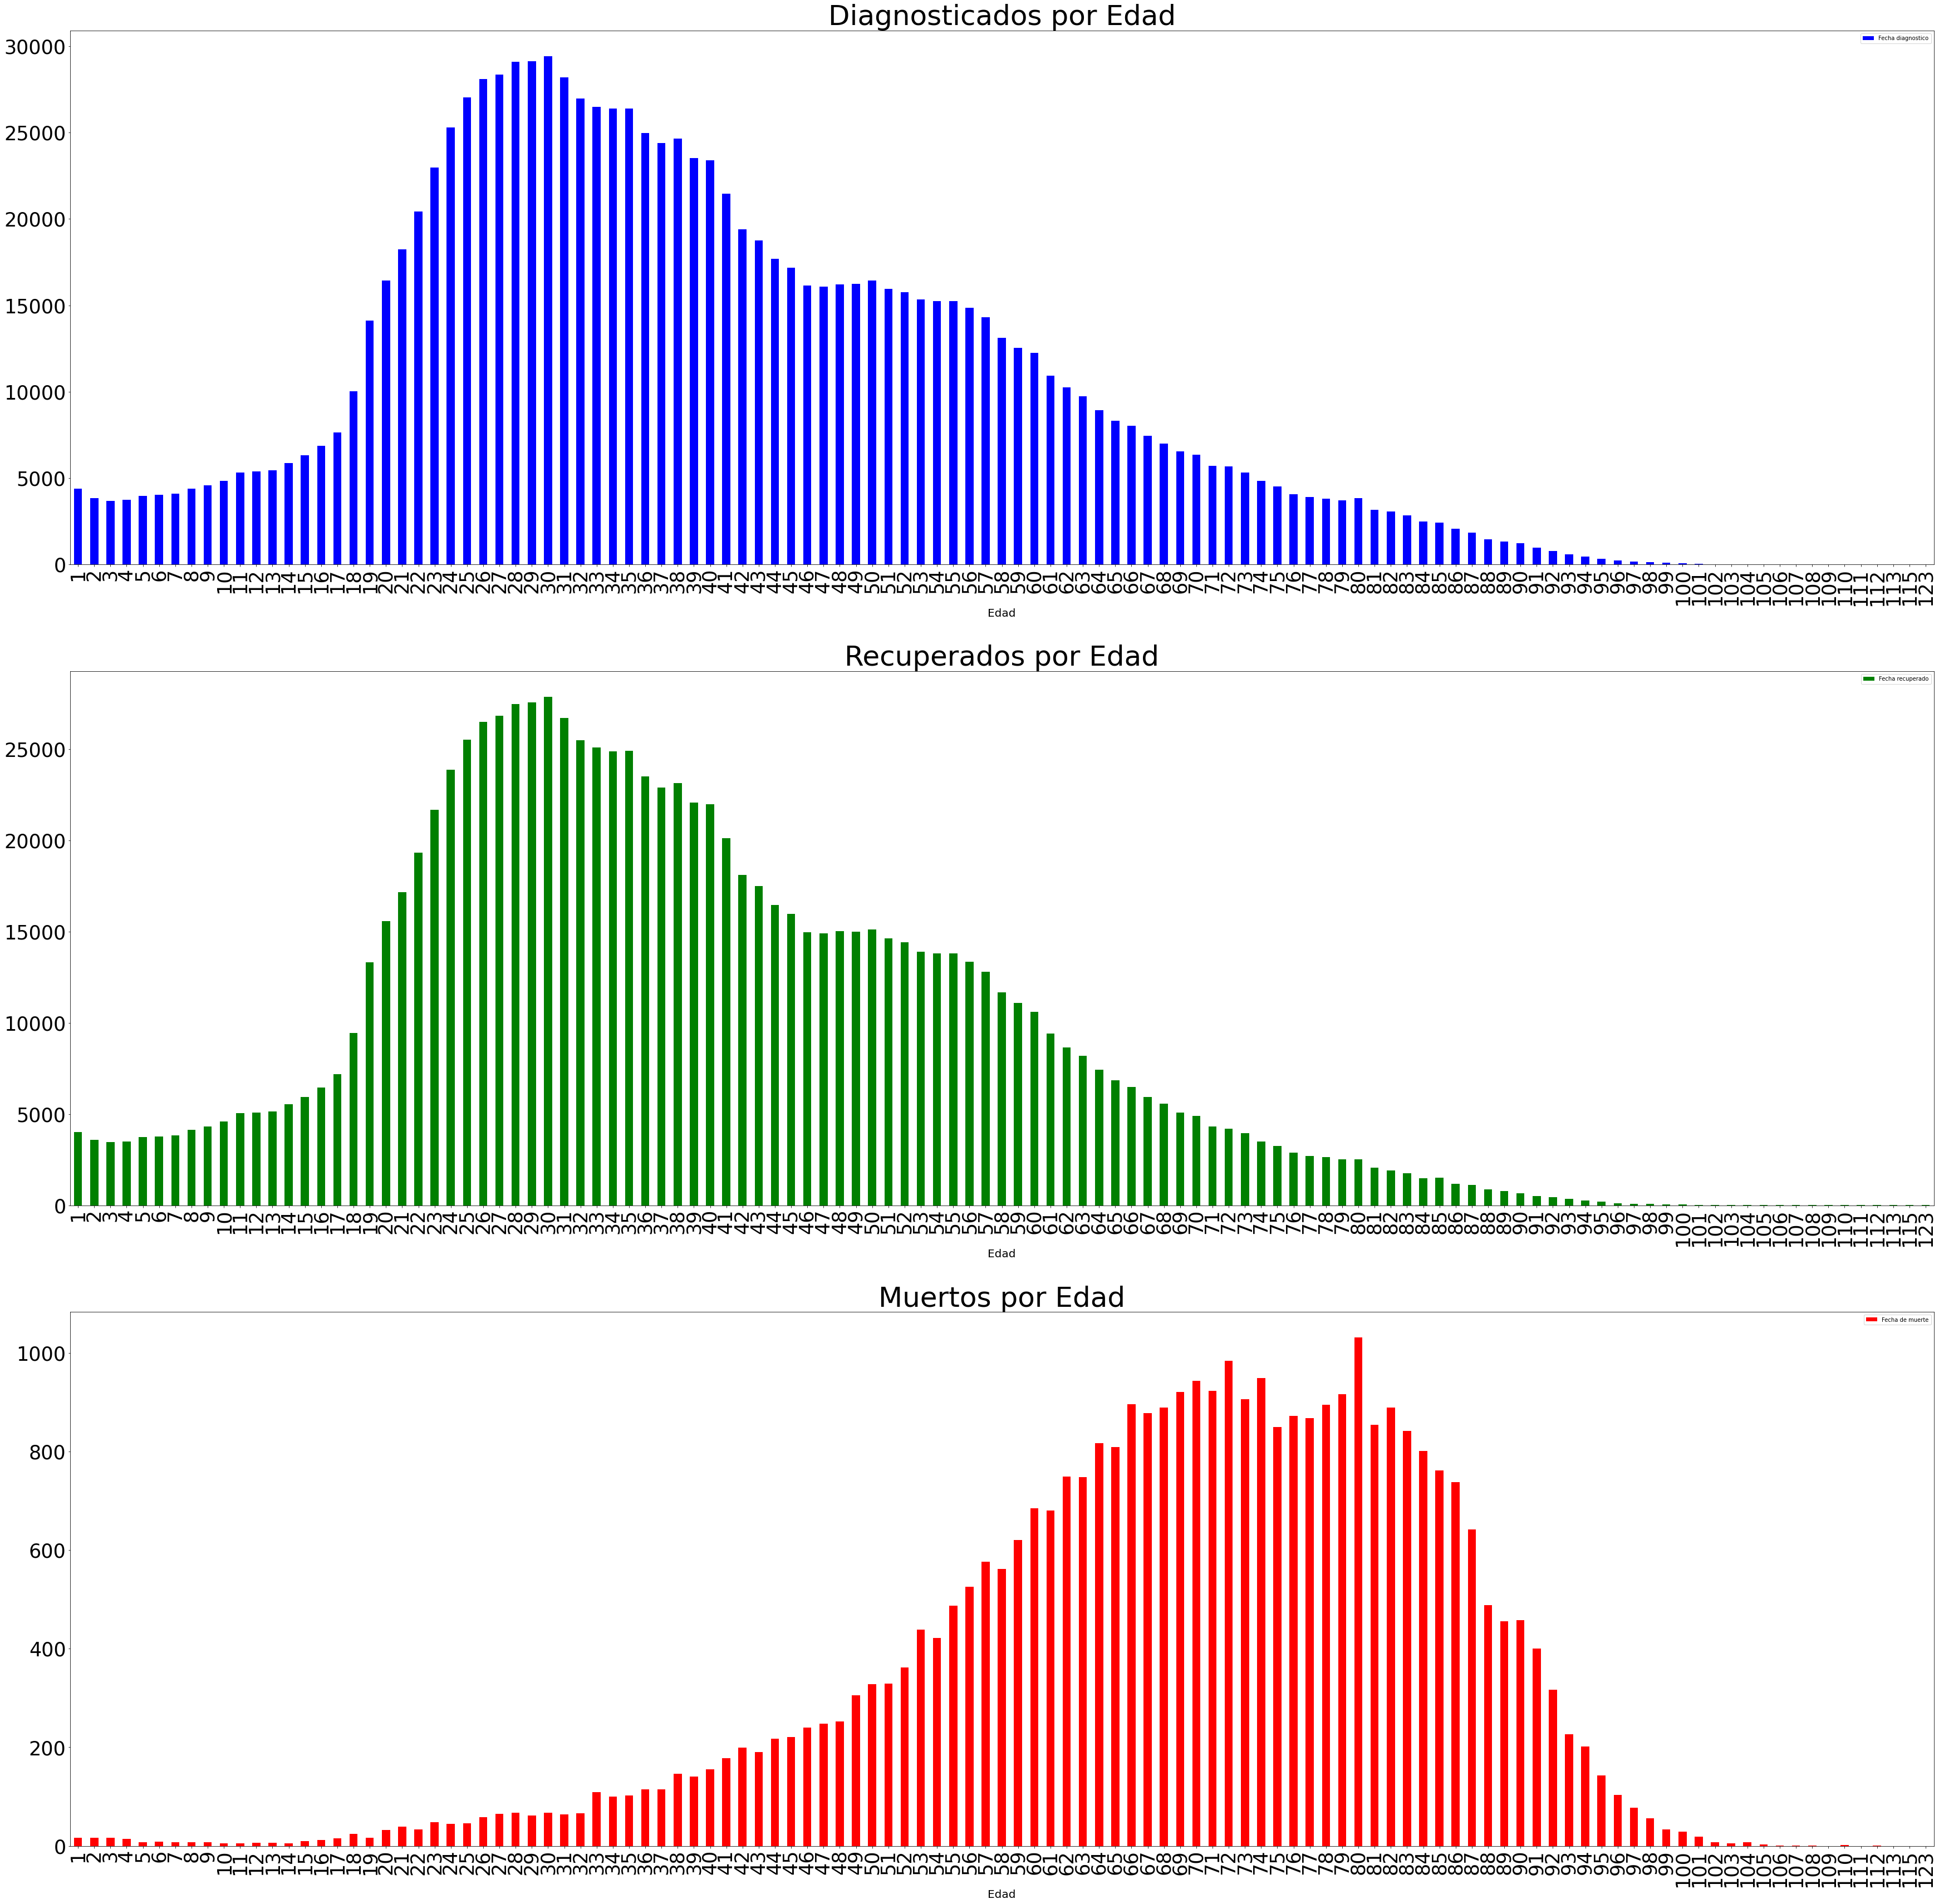

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(60, 60))

(df.groupby(['Edad'])[["Fecha diagnostico"]].count()).plot.bar(ax=axes[0], color = 'b', fontsize=35); axes[0].set_title('Diagnosticados por Edad', fontsize=50)
(df.groupby(['Edad'])[["Fecha recuperado"]].count()).plot.bar(ax=axes[1], color = 'g', fontsize=35); axes[1].set_title('Recuperados por Edad', fontsize=50)
(df.groupby(['Edad'])[["Fecha de muerte"]].count()).plot.bar(ax=axes[2], color = 'r', fontsize=35);axes[2].set_title('Muertos por Edad', fontsize=50)

### Estado Pacientes

In [48]:
#Remplazando "LEVE" por "leve" solo hay reg de esta categoria
df["Estado"] = df["Estado"].replace({"LEVE": "Leve"})
df.Estado.value_counts()

Leve         1052479
Fallecido      32209
Moderado       22694
leve            4866
Grave           2351
moderado           1
Name: Estado, dtype: int64

In [49]:
df_estado = df['Estado'].value_counts().reset_index(name='Total')
df_estado = df_estado.rename(columns={"index": "Estado"})
df_estado

,Estado,Total
0,Leve,1052479
1,Fallecido,32209
2,Moderado,22694
3,leve,4866
4,Grave,2351
5,moderado,1


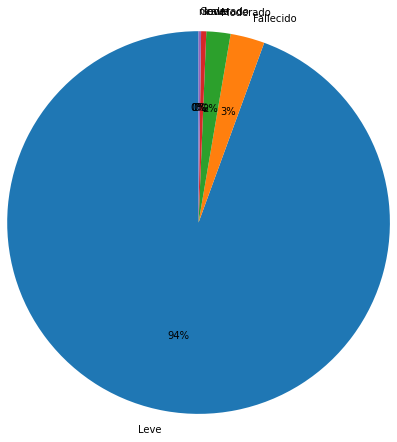

In [50]:
# Distribucón porcentual por departamento o distritos

plt.pie(df_estado['Total'], 
        labels=df_estado['Estado'], 
        startangle=90,
        autopct='%1.0f%%',
        radius=2.2,
        textprops={'fontsize': 10}, 
       )





fig.set_size_inches(10,10)

In [51]:
df_estado_2 = df.groupby(['Mes','Estado'])["Estado"].count().reset_index(name='Total')
df_estado_2.head()

,Mes,Estado,Total
0,1.0,Fallecido,1072
1,1.0,Grave,65
2,1.0,Leve,36577
3,1.0,Moderado,824
4,1.0,leve,1052


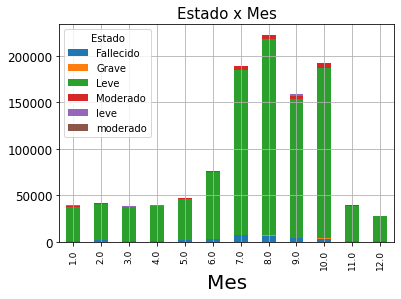

In [52]:
tabla_estado_2 = (pd.pivot_table(df_estado_2, values='Total', index=["Mes"], columns=['Estado'], aggfunc=np.sum))
tabla_estado_2.plot(kind='bar', stacked=True)
plt.title("Estado x Mes")
plt.grid()

### Recuperación Pacientes

In [53]:
lista_index_sobreviviente = df[df['Estado'] != "Fallecido"].index.values.tolist()

In [54]:
df["Tiempo Recuperacion"] = (df.loc[lista_index_sobreviviente,"Fecha recuperado"] - 
                             df.loc[lista_index_sobreviviente,"Fecha de notificación"]) 

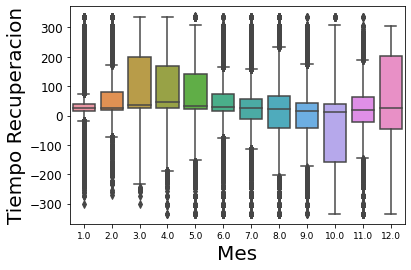

In [55]:
df["Tiempo Recuperacion"] = df["Tiempo Recuperacion"]/ np.timedelta64(1, 'D') # Pasando a decimal
df_recup = df[df['Tiempo Recuperacion'].notnull()]
ax = sns.boxplot(x="Mes", y="Tiempo Recuperacion", data=df_recup)

In [56]:
# Promedio en dias
df.groupby(['Mes'])[["Tiempo Recuperacion"]].mean()

,Tiempo Recuperacion
Mes,
1.0,33.244478
2.0,59.979367
3.0,86.805559
4.0,80.292335
5.0,65.220682
6.0,29.156424
7.0,20.211686
8.0,0.734021
9.0,-1.530060


### Departamento o Distrito, Estado, Edad, Numero de casos

In [57]:
df_3 = df.groupby(['Estado', 'Edad', 'Clasif_Pareto'])["Estado"].count().reset_index(name='Total')

Text(0.5, 1.0, 'Departamento o Distrito, Estado, Edad, Numero de casos')

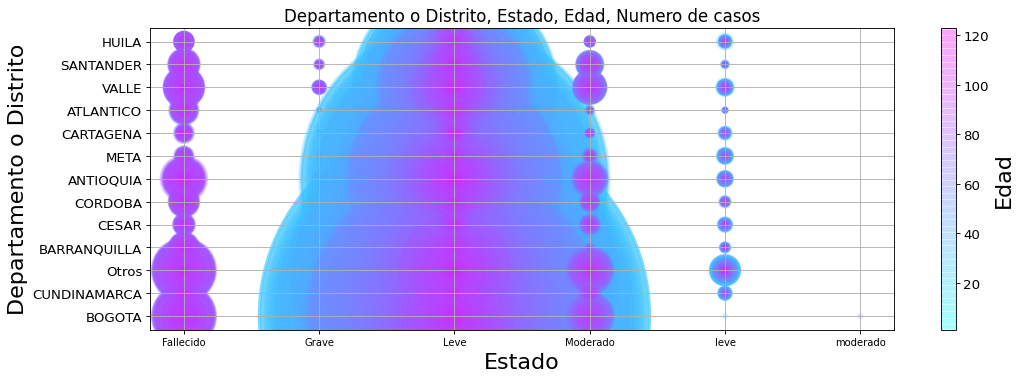

In [58]:
plt.figure(figsize=(15, 5), dpi=80)
plt.scatter(df_3["Estado"], df_3["Clasif_Pareto"], alpha=0.2,
           s=15*df_3["Total"], c=df_3["Edad"], cmap='cool')


plt.xlabel('Estado')
plt.ylabel('Departamento o Distrito')

#plt.colorbar();  # show color scal
plt.grid(True)

cbar = plt.colorbar(label='Edad')

plt.title('Departamento o Distrito, Estado, Edad, Numero de casos') # Titulo de la grafica